In [1]:
from tables import Table
import tkinter as tk
root = tk.Tk()
app = Table(master=root)
app.mainloop()

тут я создал 207.tab, 207_2.tab, 207_3.tab, 207_4.tab

In [2]:
from praclib import read_from_file
tab1 = read_from_file("tables/207.tab", "\t")
tab2 = read_from_file("tables/207_2.tab", "\t")
tab3 = read_from_file("tables/207_3.tab", "\t")
tab4 = read_from_file("tables/207_4.tab", "\t")

nu = 1.59 ± 0.02
s = 1.7 ± 0.5, s_teor = 1.6 ± 0.2


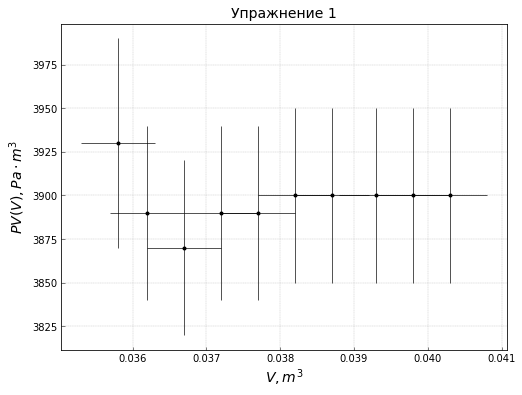

In [12]:
#Первое упражнение
%matplotlib inline
P = (tab1[:-1:, 0] + tab1[1::, 0]) / 2
T = (tab1[:-1:, 1] + tab1[1::, 1]) / 2
dV = tab1[1::, 2] - tab1[:-1:, 2]
from value import Value
import numpy as np
Pval= np.array([Value(values=[i], syst=1.0) for i in P]) * Value(const=100)
dVval = np.array([Value(values=[i], syst=0.5) for i in dV]) * Value(const=0.001)
Tval= np.array([Value(values=[i], syst=0.5) for i in T])
Vval = np.array([Value(values=[i], syst=0.5) for i in (tab1[1::, 2] + tab1[:-1:, 2]) / 2]) * Value(const=0.001)
dA = Pval * dVval
dS = dA / Tval
from functools import reduce
S = reduce(lambda a, b: a + b, dS, Value(const=0.0))
R = Value(const=8.31)
nu = Pval[0] * Vval[0] / (R * Tval[0])
print("nu =", nu)
from sympy import log
Steor = nu * R * (Vval[-1] / Vval[0]).use_func(log)
print("s = {}, s_teor = {}".format(str(S), str(Steor)))
from plotter import Plotter
Plotter.NUMBER_OF_SIGMA = 1.0
Plotter(draw_legend=False).set_name("207_1").set_title("Упражнение 1").set_x_name("$V, m^3$").set_y_name(
        "$PV(V), Pa \cdot m^3$"). \
        add_line(Plotter.get_new_line(y_value=Pval * Vval, x_value=Vval,
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

Division by zero but
A = 31.17357001972386
B = 0.008934911242603585


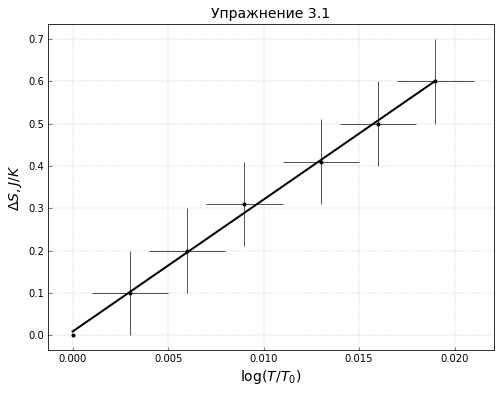

Cv = 19.6 ± 0.3 Cv_teor = 20.775000000000002131628207280300557613372802734375 ± 0


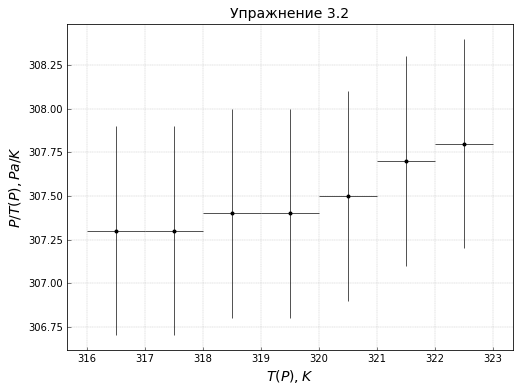

In [36]:
#Третье упражнение
P = (tab3[:-1:, 0] + tab3[1::, 0]) / 2
T = (tab3[:-1:, 1] + tab3[1::, 1]) / 2
Pval= np.array([Value(values=[i], syst=1.0) for i in P]) * Value(const=100)
Tval= np.array([Value(values=[i], syst=0.5) for i in T])
Vval = np.array([Value(values=[i], syst=0.5) for i in (tab3[1::, 2] + tab3[:-1:, 2]) / 2]) * Value(const=0.001)
cp = Value(const=7/2) * R

dt = np.array([i.use_func(log) for i in (Tval / Tval[0])])
dp = np.array([i.use_func(log) for i in (Pval / Pval[0])])
S = (dt* cp - dp* R) * nu

Plotter.NUMBER_OF_SIGMA = 1.0
Plotter(draw_legend=False).set_name("207_3").set_title("Упражнение 3.1").set_y_name("$\Delta S, J/K$").set_x_name(
        "$\log(T/T_0)$"). \
        add_line(Plotter.get_new_line(y_value=S[::], x_value=dt[::],
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)
Cv = Value(const=31.17367) / nu
print("Cv = {} Cv_teor = {}".format(str(Cv), str(R * Value(const = 5 / 2))))

Plotter(draw_legend=False).set_name("207_3_2").set_title("Упражнение 3.2").set_y_name("$P / T(P), Pa / K$").set_x_name(
        "$T(P), K$"). \
        add_line(Plotter.get_new_line(y_value=Pval / Tval, x_value=Tval,
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

Division by zero but
A = 42.94436906377205
B = -0.037164179104477536


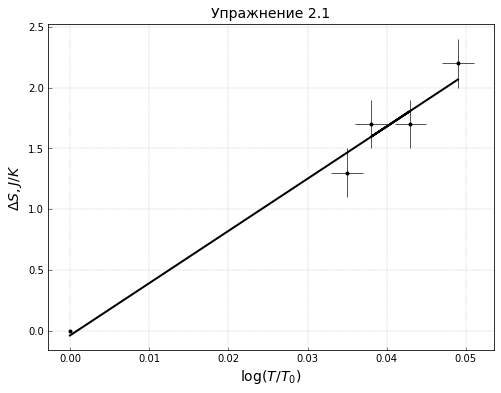

Cv = 27.1 ± 0.4 Cv_teor = 29.08500000000000085265128291212022304534912109375 ± 0


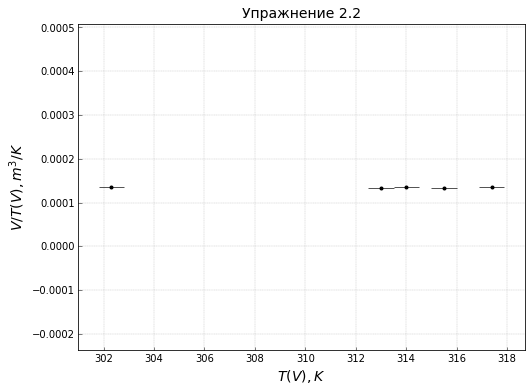

In [35]:
#Второе упражнение
P = (tab2[:-1:, 0] + tab2[1::, 0]) / 2
T = (tab2[:-1:, 1] + tab2[1::, 1]) / 2
Pval= np.array([Value(values=[i], syst=1.0) for i in P]) * Value(const=100)
Tval= np.array([Value(values=[i], syst=0.5) for i in T])
Vval = np.array([Value(values=[i], syst=0.5) for i in (tab2[1::, 2] + tab2[:-1:, 2]) / 2]) * Value(const=0.001)
cv = Value(const=5/2) * R

dt = np.array([i.use_func(log) for i in (Tval / Tval[0])])
dv = np.array([i.use_func(log) for i in (Vval / Vval[0])])
S = (dt* cv + dv* R) * nu

Plotter.NUMBER_OF_SIGMA = 1.0
Plotter(draw_legend=False).set_name("207_2").set_title("Упражнение 2.1").set_y_name("$\Delta S, J/K$").set_x_name(
        "$\log(T/T_0)$"). \
        add_line(Plotter.get_new_line(y_value=S[::], x_value=dt[::],
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)
Cv = Value(const=42.943) / nu
print("Cv = {} Cv_teor = {}".format(str(Cv), str(R * Value(const = 7 / 2))))

Plotter(draw_legend=False).set_name("207_2_2").set_title("Упражнение 2.2").set_y_name("$V / T(V), m^3/K$").set_x_name(
        "$T(V), K$"). \
        add_line(Plotter.get_new_line(y_value=Vval / Tval, x_value=Tval,
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)